#### Importing the required Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

#import warnings
from warnings import filterwarnings
filterwarnings('ignore')

##### Reading the datasets

In [2]:
real = pd.read_csv("E:\data science excelr\project 3\dataset,objective,groups\True.csv", encoding='latin')
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [3]:
fake = pd.read_csv("E:\data science excelr\project 3\dataset,objective,groups\Fake.csv", encoding='latin')
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


### Performing EDA on the data

In [4]:
# Adding the labels to the datasets as 0-fake, 1-real
real['label'] = 1
fake['label'] = 0
#real.head()
#fake.head()

# removing 'date' feature as it is unnecessary for our model
real_ = real.drop('date', axis=1, inplace=True)
fake_ = fake.drop('date', axis=1, inplace=True)

In [5]:
# Now combining the two datasets into one
combined = pd.concat([real, fake], ignore_index=True)
combined

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0
44895,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0


##### Data Summary and Null Values

In [6]:
# to get the information of the data
combined.info()

# checking for null values
print("\n\nNull values:\n",combined.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   label    44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


Null values:
 title      0
text       0
subject    0
label      0
dtype: int64


##### Checking for Duplicates
    Duplicates can waste computational resources and time by increasing the size and complexity of data.
    They can bias the model towards the duplicated data.
    They can inflate the performance metrics of the model.

Total no. of Duplicates in both the datasets: (213, 4)
Duplicates in Real dataset: (209, 4)
Duplicates in Fake dataset: (4, 4)


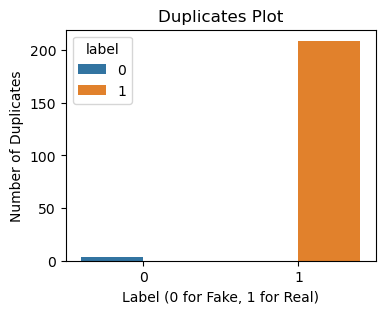

In [7]:
# checking for duplicates if present in the data
print("Total no. of Duplicates in both the datasets:",combined[combined.duplicated()].shape)
print("Duplicates in Real dataset:",real[real.duplicated()].shape)
print("Duplicates in Fake dataset:",fake[fake.duplicated()].shape)

plt.figure(figsize=(4, 3))
sns.countplot(x='label', data=combined[combined.duplicated()], hue='label')
plt.title("Duplicates Plot")
plt.xlabel("Label (0 for Fake, 1 for Real)")
plt.ylabel("Number of Duplicates")
plt.show()

In [8]:
# to remove duplicates from the data
combined.drop_duplicates(inplace=True)
combined[combined.duplicated()].shape

(0, 4)

##### Distribution of the data

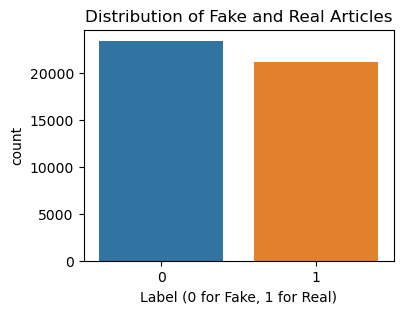

0    23477
1    21208
Name: label, dtype: int64

In [9]:
# Fake and Real Distribution
plt.figure(figsize=(4, 3))
sns.countplot(x='label', data=combined)
plt.title("Distribution of Fake and Real Articles")
plt.xlabel("Label (0 for Fake, 1 for Real)")
plt.show()

combined['label'].value_counts()

    As there's not much imbalance between them, we decided to use classification models like Random Forest, Logistic Regression, etc.. which will perform effectively on the data.

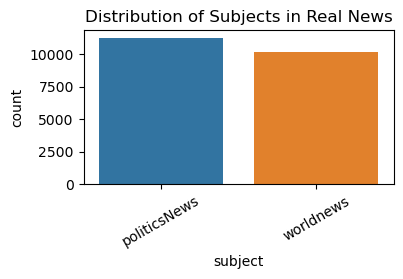

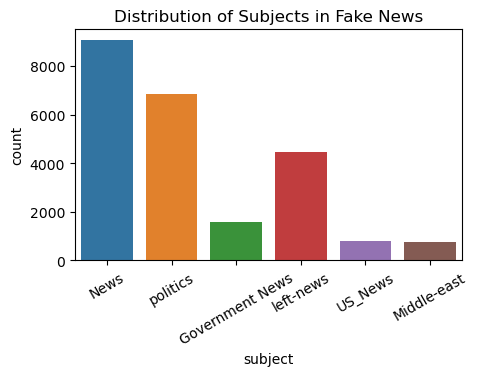

In [10]:
# Subject Distribution
# The different types of subjects can be used to predict more accurately

# Real Articles
plt.figure(figsize=(4, 2))
sns.countplot(x='subject', data=real)
plt.title("Distribution of Subjects in Real News")
plt.xticks(rotation=30)
plt.show()
# Fake Articles
plt.figure(figsize=(5, 3))
sns.countplot(x='subject', data=fake)
plt.title("Distribution of Subjects in Fake News")
plt.xticks(rotation=30)
plt.show()

##### Combining text and title

In [11]:
# Combining both the features 'title' and 'text'
combined.insert(loc=0, column='combined_text', value= combined['title'] + ' ' + combined['text'])
combined.drop(['title','text'], axis=1, inplace=True)
combined.head()

,combined_text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,1
1,U.S. military to accept transgender recruits o...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,politicsNews,1


##### Text Cleaning

In [12]:
# Function to handle abbreviations
abbreviations = {'U.S.': 'United States'}
def replace_abbreviations(text):
    for abbreviation, full_form in abbreviations.items():
        text = text.replace(abbreviation, full_form)
    return text

# Removing unnecessary characters like 'ï, é'
from unidecode import unidecode
# Function to remove diacritics and convert to lowercase
def clean_text(text):
    cleaned_text = unidecode(text.lower())
    return cleaned_text

combined['combined_text'] = combined['combined_text'].apply(replace_abbreviations)
combined['combined_text'] = combined['combined_text'].apply(clean_text)

In [13]:
import wordninja

def split_combined_words(text):
    split_words = [wordninja.split(word) for word in text.split()]
    return ' '.join([word for sublist in split_words for word in sublist])

# Apply the function to the 'combined_text' column
combined['combined_text'] = combined['combined_text'].apply(split_combined_words)

In [14]:
!pip install contractions
'''# Splitting combined words
import wordninja
def split_combined_words(text):
    words = text.split()
    split_words = []
    for word in words:
        split_words.extend(wordninja.split(word))
    return ' '.join(split_words)
combined['combined_text'] = combined['combined_text'].apply(split_combined_words)
'''
import contractions
combined['combined_text'] = combined['combined_text'].apply(lambda text: contractions.fix(text))

# Function to remove single letters and multiple spaces
import re
def remove_single_letters(text):
    pattern = r'\s\b[a-zA-Z]\b\s|\b[a-zA-Z]\b\s|\s\b[a-zA-Z]\b'
    cleaned_text = re.sub(pattern, ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text.strip()

# Punctuations Removal
custom_punctuation = "$%&()'-*+,./:;<=>@[\]^_`{|}~"  # except !,?
def remove_custom_punctuation(text):
    translator = str.maketrans('', '', custom_punctuation)
    text_without_punctuation = text.translate(translator)
    return text_without_punctuation

combined['combined_text'] = combined['combined_text'].apply(remove_single_letters)
combined['combined_text'] = combined['combined_text'].apply(remove_custom_punctuation)

##### Identifying and Removing unnecessary characters using TF-IDF Vectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_data = combined['combined_text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
# Getting feature names and their corresponding TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
# Setting a threshold for TF-IDF scores to identify unnecessary words
threshold = 3.0
unnecessary_words_set = set(feature_names[tfidf_scores < threshold])
# Including stopwords in the set of unnecessary words
stopwords_set = set(tfidf_vectorizer.get_stop_words())
unnecessary_words_set |= stopwords_set

# Print the count and some of the unnecessary words
print('\nCount of Words:', len(unnecessary_words_set))
print('\n', list(unnecessary_words_set)[:500])

# Remove unnecessary words from the text data
combined['combined_text'] = combined['combined_text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in unnecessary_words_set]))


Count of Words: 47141

 ['sinning', 'consigned', 'arnaldo', 'reversion', 'lynda', 'defoliate', 'worshipping', 'pulsar', 'isley', 'waives', '1403', 'also', 'gouda', 'muffins', 'reinterpret', 'blur', 'blowouts', 'scotia', 'imperceptibly', 'summarizes', 'hellish', 'ices', 'ploughs', 'humorless', 'disturbances', 'busing', 'hounded', 'collides', 'constitutions', 'globule', 'shipyards', 'bernadette', 'modifier', 'sekar', 'immaculate', 'nodes', 'reprinted', 'shaykh', 'righteousness', 'kuh', 'airbases', 'stiles', 'socotra', 'anecdotes', 'rehashes', 'zygotes', 'overcame', 'nafees', 'doping', 'extras', 'clito', 'journals', 'efficacy', 'lacrosse', 'matrix', 'journ', 'chatrooms', 'arraignments', 'yoo', 'outrunning', 'unhealthy', 'escapees', 'moist', 'prejudicing', 'omitting', 'insignia', 'pseudonym', 'subcontractors', 'vliet', '448', 'curtiss', 'henna', 'infiltrating', 'mri', 'tila', 'here', 'gmail', 'prasad', 'enigma', 'masterplan', 'foreshadowing', 'montoya', 'khl', 'recurve', 'washtub', 'confi

##### Text Length Analysis and Outlier Check
    - Analyzing no. of characters present in the text
    - Checking for outliers using Inter-Quartile Range method

    The text_length can be used as a feature while building the model, to help in differentiating real articles from fake articles.
    It can also be used in identifying and removing outliers.

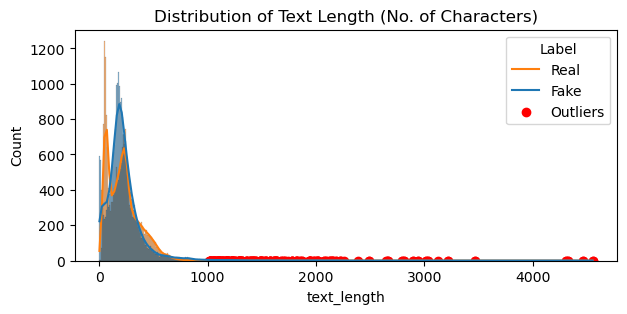

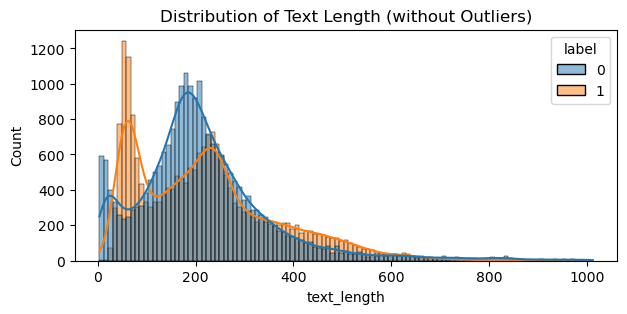

In [16]:
# Text Length Analysis
# calculating text length for each article
combined['text_length'] = combined['combined_text'].apply(lambda x: len(x.split()))

# Identifying Outliers
# Calculate the IQR for text_length
Q1 = combined['text_length'].quantile(0.25)
Q3 = combined['text_length'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 4.5 * IQR
# Identify and create a DataFrame of outliers
outliers = combined[(combined['text_length'] < lower_bound) | (combined['text_length'] > upper_bound)]
# plotting the distribution
plt.figure(figsize=(7, 3))
sns.histplot(data=combined, x='text_length', hue='label', kde=True, common_norm=False)
plt.scatter(outliers['text_length'], [0] * len(outliers), c='red')
plt.title("Distribution of Text Length (No. of Characters)")
plt.legend(title="Label", labels=["Real","Fake","Outliers"])
plt.show()

# Removing Outliers

no_outliers = combined.copy()
no_outliers=no_outliers[(no_outliers['text_length']>=lower_bound)&(no_outliers['text_length']<=upper_bound)]
plt.figure(figsize=(7, 3))
sns.histplot(data=no_outliers, x='text_length', hue='label', kde=True, common_norm=False)
plt.title("Distribution of Text Length (without Outliers)")
plt.show()

In [17]:
# to know the no. of outliers
outliers['label'].value_counts()

0    228
1     17
Name: label, dtype: int64

In [18]:
# data after adding the text_length feature
combined.head()

,combined_text,subject,label,text_length
0,united states budget fight looms republicans f...,politicsNews,1,442
1,united states military accept transgender recr...,politicsNews,1,364
2,senior united states republican senator let mr...,politicsNews,1,249
3,fbi russia probe helped australian diplomat ti...,politicsNews,1,227
4,trump wants postal service charge amazon shipm...,politicsNews,1,486


#### Generating Word Cloud for text in articles

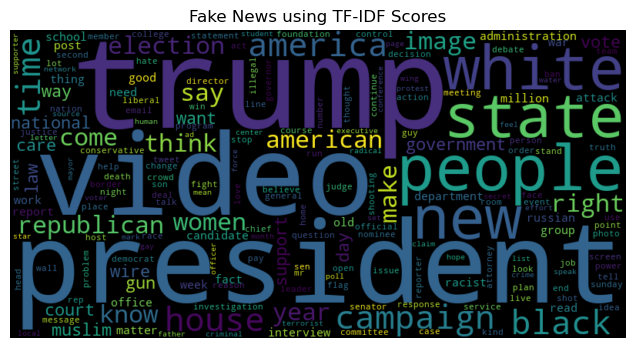

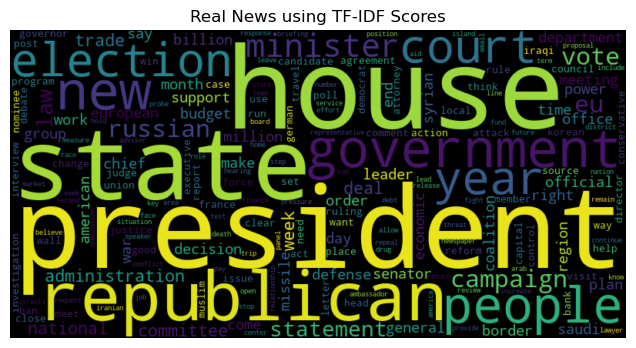

In [19]:
# Function for generating word cloud
def generate_word_cloud(text_data, title):
    # Fit and transform the TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    # Get feature names and their corresponding TF-IDF scores
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    tfidf_data = pd.DataFrame({'Feature': feature_names, 'TFIDF_Score': tfidf_scores})
    tfidf_data = tfidf_data.sort_values(by='TFIDF_Score', ascending=False)
    
    threshold = 3.0
    important_words = tfidf_data[tfidf_data['TFIDF_Score'] > threshold]['Feature'].tolist()

    # Creating word cloud with the important words
    wordcloud = WordCloud(width=800, height=400).generate(" ".join(important_words))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generating word clouds for fake and real news
generate_word_cloud(combined[combined['label'] == 0]['combined_text'], "Fake News using TF-IDF Scores")
generate_word_cloud(combined[combined['label'] == 1]['combined_text'], "Real News using TF-IDF Scores")

### Sentiment Analysis

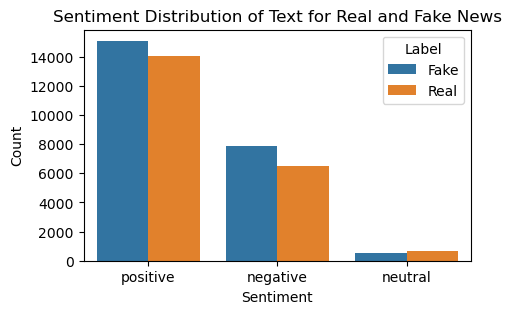

In [20]:
# Function for analysing the sentiment
def sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data = combined.copy()
# Applying sentiment analysis to the combined data
data['sentiment'] = data['combined_text'].apply(sentiment)

# Sentiment Distribution for both true and fake datasets
plt.figure(figsize=(5, 3))
sns.countplot(x='sentiment', data=data, hue='label')
plt.title("Sentiment Distribution of Text for Real and Fake News")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title="Label", labels=["Fake", "Real"])
plt.show()

### N-gram Analysis

In [21]:
# Function to get top n-grams using TF-IDF vectorizer
def get_top_ngrams(corpus, ngram_range=(1, 1), n=None, stop_words='english', tfidf_threshold=0.1):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range, stop_words=stop_words)
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    # Get feature names and their corresponding TF-IDF scores
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    important_ngrams = [feature for feature, score in zip(feature_names, tfidf_scores) if score > tfidf_threshold]
    if n:
        important_ngrams = sorted(zip(important_ngrams, tfidf_scores), key=lambda x: x[1], reverse=True)[:n]
    return important_ngrams

    Top Bigrams

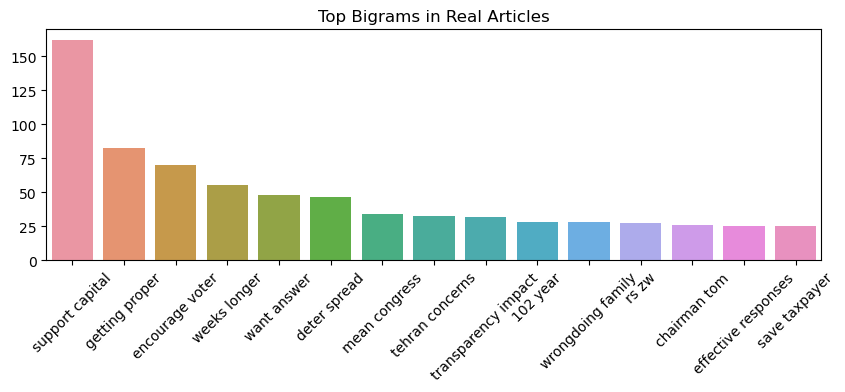

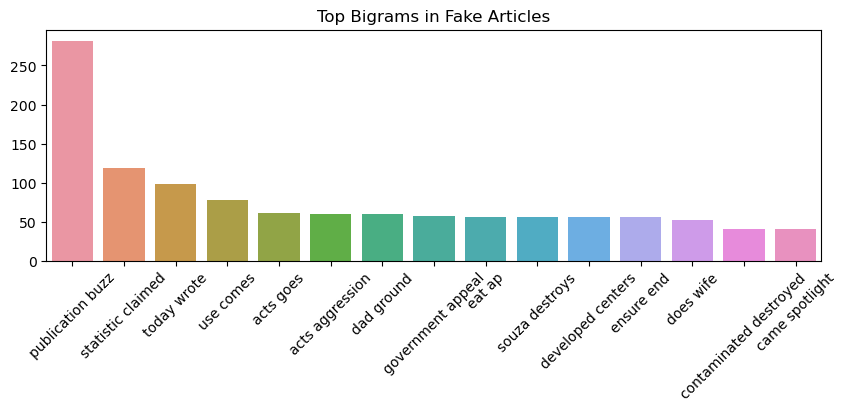

In [22]:
# top bigrams in Real articles
top_bigrams_real = get_top_ngrams(combined[combined['label'] == 1]['combined_text'], 
                                  ngram_range=(2, 2), n=15)
plt.figure(figsize=(10, 3))
sns.barplot(x=[bigram[0] for bigram in top_bigrams_real],
            y=[bigram[1] for bigram in top_bigrams_real])
plt.title("Top Bigrams in Real Articles")
plt.xticks(rotation=45)

# top bigrams in Fake articles
top_bigrams_fake = get_top_ngrams(combined[combined['label'] == 0]['combined_text'], 
                                  ngram_range=(2, 2), n=15)
plt.figure(figsize=(10, 3))
sns.barplot(x=[bigram[0] for bigram in top_bigrams_fake], 
            y=[bigram[1] for bigram in top_bigrams_fake])
plt.title("Top Bigrams in Fake Articles")
plt.xticks(rotation=45)
plt.show()

    Top Trigrams

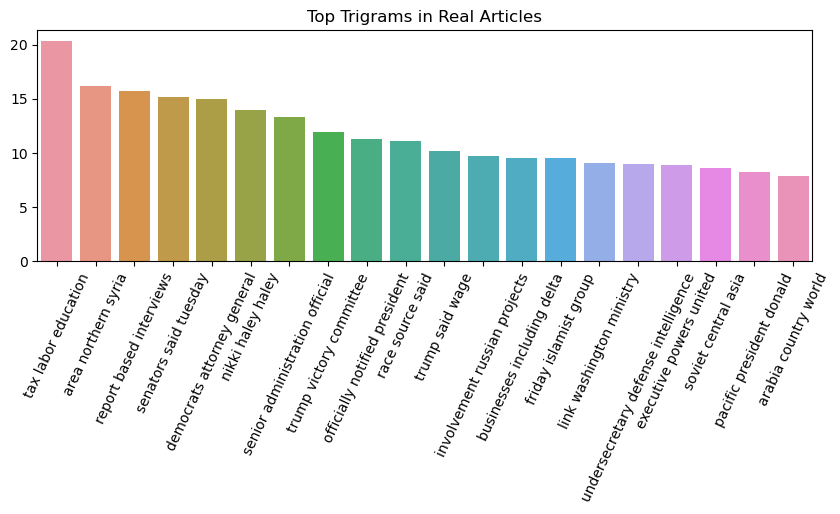

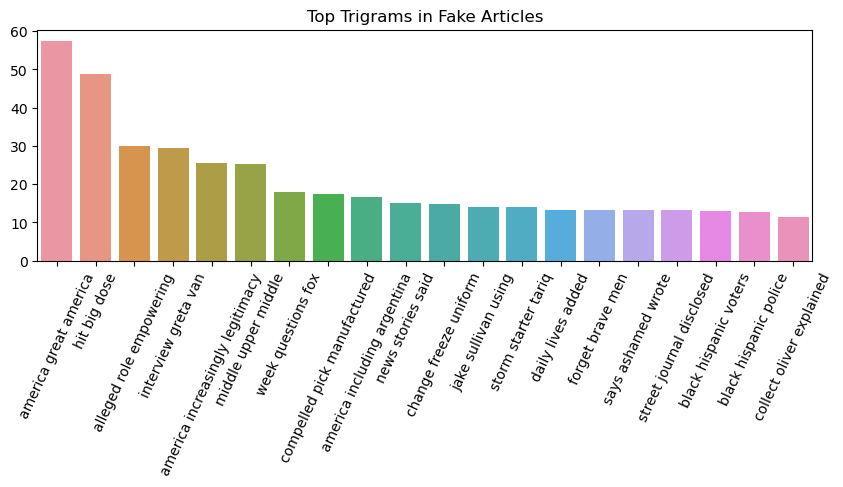

In [23]:
# top trigrams in Real articles
top_trigrams_real = get_top_ngrams(combined[combined['label'] == 1]['combined_text'], 
                                  ngram_range=(3, 3), n=20)
plt.figure(figsize=(10, 3))
sns.barplot(x=[trigram[0] for trigram in top_trigrams_real],
            y=[trigram[1] for trigram in top_trigrams_real])
plt.title("Top Trigrams in Real Articles")
plt.xticks(rotation=65)

# top trigrams in Fake articles
top_trigrams_fake = get_top_ngrams(combined[combined['label'] == 0]['combined_text'], 
                                  ngram_range=(3, 3), n=20)
plt.figure(figsize=(10, 3))
sns.barplot(x=[trigram[0] for trigram in top_trigrams_fake], 
            y=[trigram[1] for trigram in top_trigrams_fake])
plt.title("Top Trigrams in Fake Articles")
plt.xticks(rotation=65)
plt.show()

##### Feature Engineering

In [24]:
from sklearn.preprocessing import LabelEncoder

# Label encoding 'subject'
label_encoder = LabelEncoder()
combined['subject'] = label_encoder.fit_transform(combined['subject'])
combined

,combined_text,subject,label,text_length
0,united states budget fight looms republicans f...,6,1,442
1,united states military accept transgender recr...,6,1,364
2,senior united states republican senator let mr...,6,1,249
3,fbi russia probe helped australian diplomat ti...,6,1,227
4,trump wants postal service charge amazon shipm...,6,1,486
...,...,...,...,...
44893,mc pain john mccain furious iran treated sailo...,1,0,293
44894,justice yahoo mail privacy class action 4 lawy...,1,0,161
44895,sunni stan allied safe zone plan territorial n...,1,0,2074
44896,blow 700 million al jazeera america finally ca...,1,0,259


In [25]:
combined.to_pickle('clean_data.pkl')